In [4]:
import pickle
import jax.numpy as jnp
import jax
jax.config.update('jax_enable_x64',True)
jax.config.update('jax_default_device',jax.devices()[0])

import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
with open('main_results.pkl','rb') as f:
    main_results = pickle.load(f)
    
f1_vals = main_results['f1']
l2_error = main_results['l2']

In [6]:
main_results.keys()

dict_keys(['f1', 'l2'])

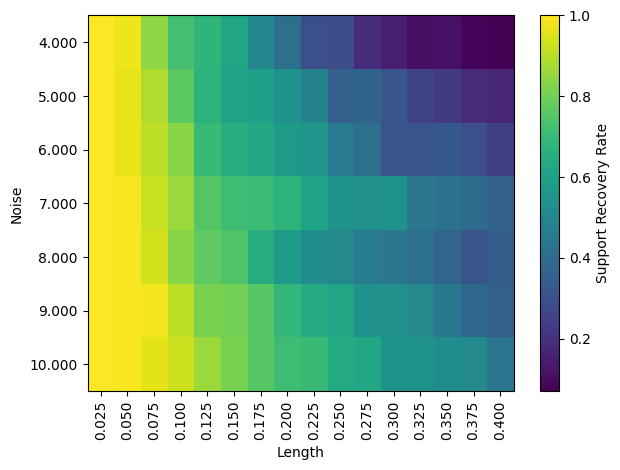

In [3]:
df_f1 = pd.DataFrame(
	{(run,seed,noise, length): val for (run,seed,noise, length), val in f1_vals.items()},
	index=[0]
).T.reset_index()
df_f1.columns = ['run','seed','noise', 'length', 'f1']
df_f1['recovered'] = (df_f1['f1']==1).astype('int')
# df_f1.groupby(['noise','length'])['recovered'].mean()
df_f1.sort_values(['length','noise','run','seed'])

df_recovery = df_f1.groupby(['noise','length'])['recovered'].mean().unstack(level = 'length')

df_f1 = df_f1.groupby(['noise','length'])['f1'].mean().unstack(level = 'length')

df_recovery = df_recovery.T.loc[::-1]
plt.imshow(df_recovery, aspect='auto', origin='lower')
plt.colorbar(label='Support Recovery Rate')
plt.xticks(ticks=np.arange(len(df_recovery.columns)), labels=[f"{col:.3f}" for col in df_recovery.columns], rotation=90)
plt.yticks(ticks=np.arange(len(df_recovery.index)), labels=[f"{idx:.3f}" for idx in df_recovery.index])
plt.xlabel('Length')
plt.ylabel('Noise')
plt.tight_layout()

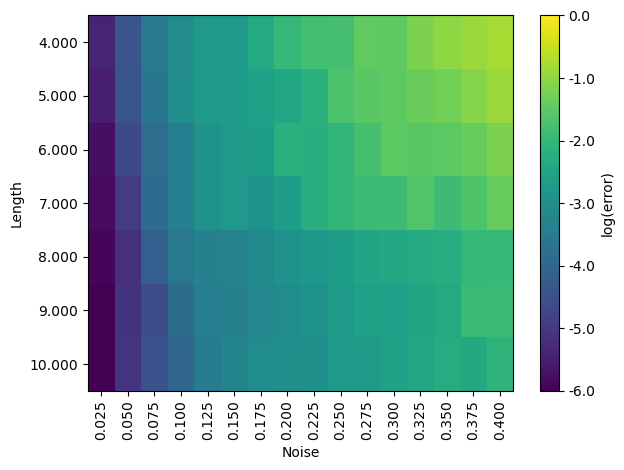

In [15]:
df_error = pd.DataFrame(
	{(run,seed,noise, length): val for (run,seed,noise, length), val in l2_error.items()},
	index=[0]
).T.reset_index()
df_error.columns = ['run','seed','noise', 'length', 'error']
df_error['error'] = np.minimum(df_error['error'],1.)

df_error = df_error.groupby(['noise','length'])['error'].mean()
df_error = df_error.unstack(level='length')
df_error = df_error.loc[:,::-1].T

plt.imshow(np.log(df_error), aspect='auto', origin='lower', vmax=0,vmin = -6)
cbar = plt.colorbar(label='log(error)',ticks = np.arange(-6,0.1))
cbar.ax.set_yticklabels(np.arange(-6,0.1))
plt.xticks(ticks=np.arange(len(df_error.columns)), labels=[f"{col:.3f}" for col in df_error.columns], rotation=90)
plt.yticks(ticks=np.arange(len(df_error.index)), labels=[f"{idx:.3f}" for idx in df_error.index])
plt.ylabel('Length')
plt.xlabel('Noise')
plt.tight_layout()

In [10]:
df_error

length,4.0,5.0,6.0,7.0,8.0,9.0,10.0
noise,,,,,,,
0.400,0.451303,0.409558,0.305100,0.246147,0.139116,0.149292,0.124121
0.375,0.407989,0.338864,0.249536,0.192802,0.135370,0.141370,0.095600
0.350,0.359910,0.278051,0.218304,0.152879,0.105056,0.096591,0.101647
0.325,0.303447,0.252300,0.213095,0.194334,0.099196,0.084459,0.089682
0.300,0.226984,0.225898,0.221458,0.152368,0.091808,0.073316,0.076957
0.275,0.232925,0.215114,0.170464,0.150524,0.084333,0.076114,0.065162
0.250,0.171900,0.183828,0.128628,0.130682,0.071358,0.064934,0.063667
0.225,0.161719,0.111319,0.107002,0.104029,0.061320,0.052221,0.050689
0.200,0.135228,0.090871,0.110757,0.071030,0.052843,0.045575,0.049581


In [6]:
df_error = pd.DataFrame(
	{(run,seed,noise, length): val for (run,seed,noise, length), val in l2_error.items()},
	index=[0]
).T.reset_index()
df_error.columns = ['run','seed','noise', 'length', 'error']
df_error['error'] = np.minimum(df_error['error'],1.)


In [7]:
df_error.groupby(["noise","length"]).size()

noise  length
0.025  4.0       128
       5.0       128
       6.0       128
       7.0       128
       8.0       128
                ... 
0.400  6.0       128
       7.0       128
       8.0       128
       9.0       128
       10.0      128
Length: 112, dtype: int64

## modified plots

In [53]:
plt.style.use('ggplot')
plt.style.use('default')
plt.rcParams["font.family"] = 'serif'
cmap = 'magma'

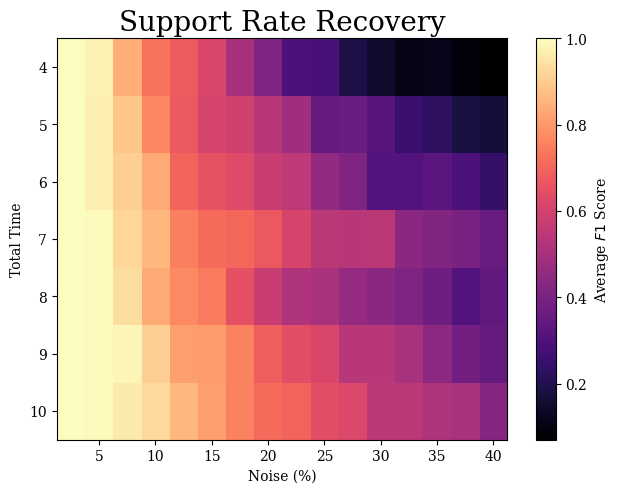

In [80]:
df_f1 = pd.DataFrame(
	{(run,seed,noise, length): val for (run,seed,noise, length), val in f1_vals.items()},
	index=[0]
).T.reset_index()
df_f1.columns = ['run','seed','noise', 'length', 'f1']
df_f1['recovered'] = (df_f1['f1']==1).astype('int')
# df_f1.groupby(['noise','length'])['recovered'].mean()
df_f1.sort_values(['length','noise','run','seed'])

df_recovery = df_f1.groupby(['noise','length'])['recovered'].mean().unstack(level = 'length')

df_f1 = df_f1.groupby(['noise','length'])['f1'].mean().unstack(level = 'length')

df_recovery = df_recovery.T.loc[::-1]
plt.imshow(df_recovery, aspect='auto',origin='lower',cmap=cmap)
plt.colorbar(label=r'Average $F1$ Score',)
skip=2
plt.xticks(ticks=np.arange(len(df_recovery.columns))[1::skip], labels=[f"{int(col*100)}" for col in df_recovery.columns][1::skip],)
plt.yticks(ticks=np.arange(len(df_recovery.index)), labels=[f"{int(idx)}" for idx in df_recovery.index])
plt.xlabel('Noise (%)')
plt.ylabel(r'Total Time')
# plt.grid(True)
plt.tight_layout()
plt.title("Support Rate Recovery",size=20)
plt.show()

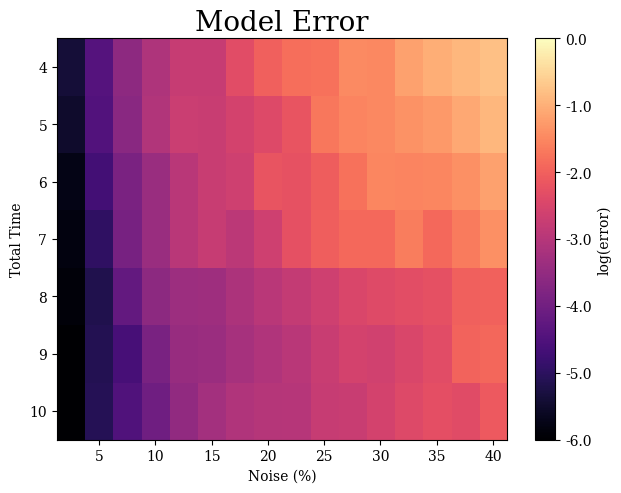

In [84]:
df_error = pd.DataFrame(
	{(run,seed,noise, length): val for (run,seed,noise, length), val in l2_error.items()},
	index=[0]
).T.reset_index()
df_error.columns = ['run','seed','noise', 'length', 'error']
df_error['error'] = np.minimum(df_error['error'],1.)

df_error = df_error.groupby(['noise','length'])['error'].mean()
df_error = df_error.unstack(level='length')
df_error = df_error.loc[:,::-1].T

plt.imshow(np.log(df_error), aspect='auto', origin='lower', vmax=0,vmin = -6,cmap=cmap)
cbar = plt.colorbar(label='log(error)',ticks = np.arange(-6,0.1))
cbar.ax.set_yticklabels(np.arange(-6,0.1))
# plt.xticks(ticks=np.arange(len(df_error.columns)), labels=[f"{col:.3f}" for col in df_error.columns], rotation=90)
# plt.yticks(ticks=np.arange(len(df_error.index)), labels=[f"{idx:.3f}" for idx in df_error.index])
plt.xticks(ticks=np.arange(len(df_recovery.columns))[1::skip], labels=[f"{int(col*100)}" for col in df_recovery.columns][1::skip],)
plt.yticks(ticks=np.arange(len(df_recovery.index)), labels=[f"{int(idx)}" for idx in df_recovery.index])
plt.ylabel('Total Time')
plt.xlabel('Noise (%)')
plt.tight_layout()
plt.title("Model Error",size=20)
plt.show()

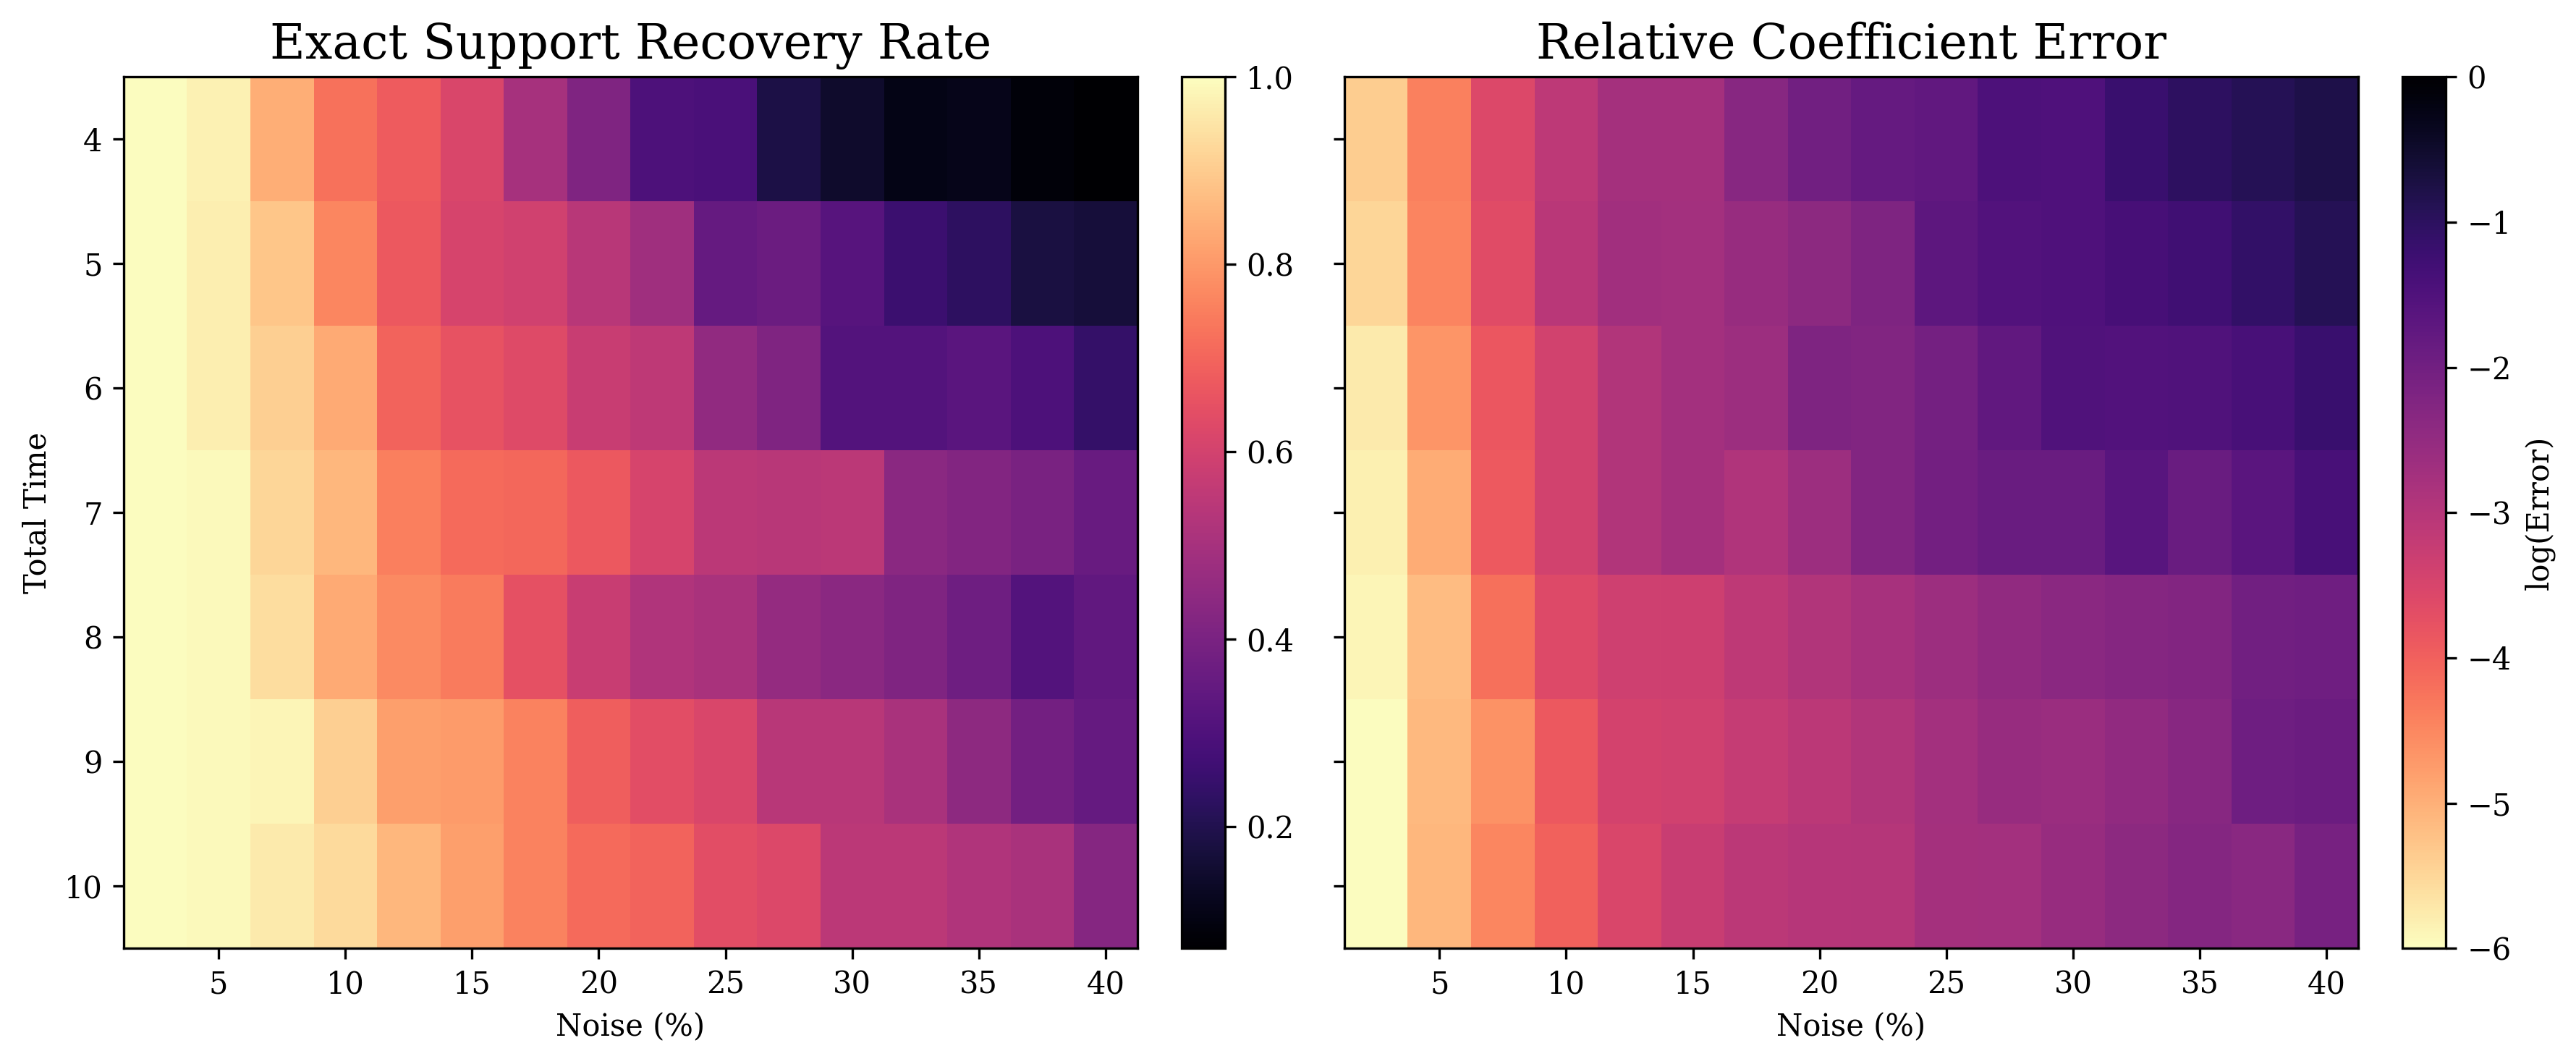

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5),dpi=300, sharex=True, sharey=True)

# --- First heatmap: F1 ---
im0 = axes[0].imshow(df_recovery, aspect='auto', origin='lower', cmap=cmap)
cbar0 = plt.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)
# cbar0.set_label(r'Average $F1$ Score')

axes[0].set_title("Exact Support Recovery Rate", size=16)
axes[0].set_xlabel("Noise (%)")
axes[0].set_ylabel("Total Time")

skip = 2
axes[0].set_xticks(np.arange(len(df_recovery.columns))[1::skip])
axes[0].set_xticklabels([f"{int(col*100)}" for col in df_recovery.columns][1::skip])
axes[0].set_yticks(np.arange(len(df_recovery.index)))
axes[0].set_yticklabels([f"{int(idx)}" for idx in df_recovery.index])

# --- Second heatmap: Error ---
im1 = axes[1].imshow(np.log(df_error), aspect='auto', origin='lower',
                     vmax=0, vmin=-6, cmap=cmap+"_r")
cbar1 = plt.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04,
                     ticks=np.arange(-6, 1))
cbar1.set_label("log(Error)")

axes[1].set_title("Relative Coefficient Error", size=16)
axes[1].set_xlabel("Noise (%)")

axes[1].set_xticks(np.arange(len(df_recovery.columns))[1::skip])
axes[1].set_xticklabels([f"{int(col*100)}" for col in df_recovery.columns][1::skip])
axes[1].set_yticks(np.arange(len(df_recovery.index)))
axes[1].set_yticklabels([f"{int(idx)}" for idx in df_recovery.index])

plt.tight_layout()
plt.savefig("lorenz_benchmark.pdf")
plt.show()


In [86]:
df_recovery

noise,0.025,0.050,0.075,0.100,0.125,0.150,0.175,0.200,0.225,0.250,0.275,0.300,0.325,0.350,0.375,0.400
length,,,,,,,,,,,,,,,,
10.0,1.0,0.992188,0.960938,0.929688,0.859375,0.812500,0.757812,0.710938,0.695312,0.640625,0.625000,0.546875,0.546875,0.523438,0.507812,0.429688
9.0,1.0,0.992188,0.984375,0.906250,0.812500,0.804688,0.757812,0.687500,0.640625,0.617188,0.539062,0.539062,0.507812,0.445312,0.382812,0.351562
8.0,1.0,0.992188,0.937500,0.835938,0.773438,0.742188,0.648438,0.578125,0.523438,0.507812,0.460938,0.437500,0.414062,0.375000,0.312500,0.343750
7.0,1.0,0.992188,0.921875,0.859375,0.750000,0.710938,0.703125,0.671875,0.609375,0.546875,0.539062,0.546875,0.437500,0.421875,0.398438,0.359375
6.0,1.0,0.968750,0.906250,0.835938,0.695312,0.656250,0.632812,0.578125,0.554688,0.453125,0.414062,0.312500,0.312500,0.328125,0.296875,0.242188
5.0,1.0,0.968750,0.890625,0.765625,0.671875,0.609375,0.593750,0.539062,0.484375,0.351562,0.367188,0.320312,0.257812,0.226562,0.179688,0.171875
4.0,1.0,0.976562,0.843750,0.726562,0.679688,0.617188,0.500000,0.414062,0.296875,0.289062,0.187500,0.148438,0.109375,0.117188,0.085938,0.070312
